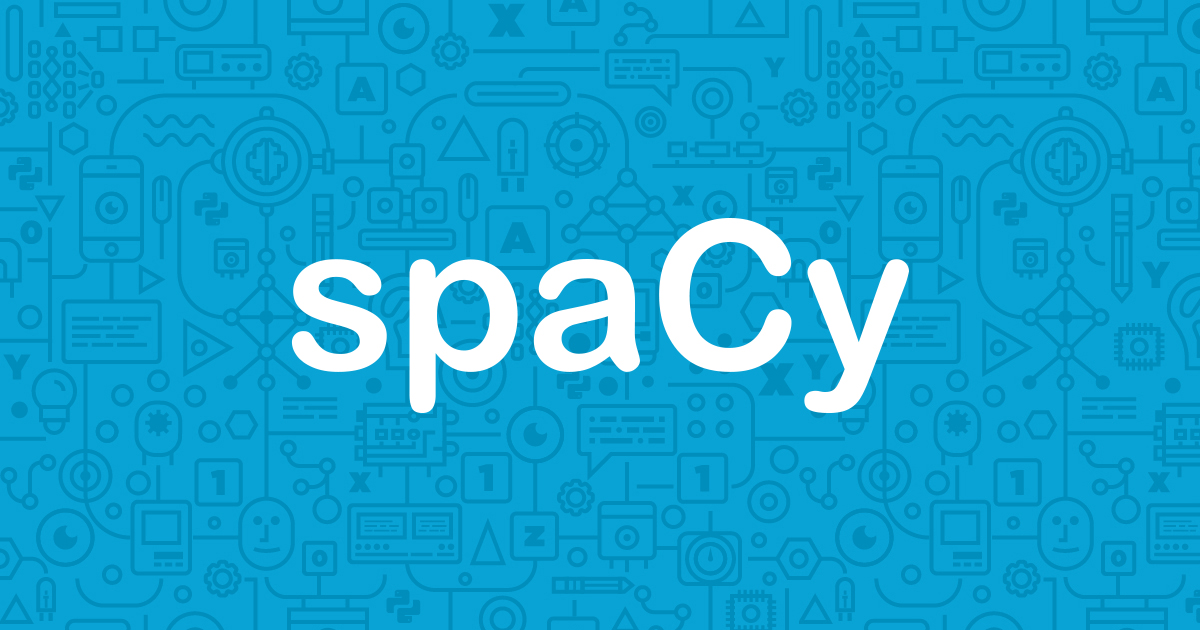

## Características lingüísticas

En esta segunda clase, veremos en detalle algunas de las **características lingüísticas de spaCy**, entre ellas algunas de las más usadas de la librería y en NLP: el **part-of-speech (POS) tagger**, **dependency parser**, **named entity recognizer (NER)** y funciones de **fusión y división** (merging/splitting).

### POS tag

Como vimos en la clase anterior, parte del pipeline de spaCy para NLP consiste en la **creación de etiquetas de part-of-speech** (POS). Obviamente, aquí surge una de las preguntas más evidentes a la hora de empezar a trabajar en esta área: **¿qué es, exactamente, una POS tag?**

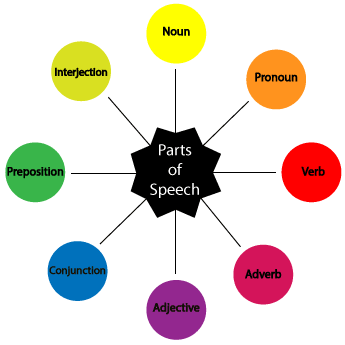

Una POS es, resumidamente, una **categoría sintáctica en la que caen todas las palabras de acuerdo su función en una oración**. El inglés, por ejemplo, tiene las nueve categorías que vemos en la imagen superior. Por supuesto que estas etiquetas **varían entre idiomas** y van a ser específicas dependiendo de en cuál trabajemos.

Estas etiquetas se las conoce como **etiquetas universales**. Son especialmente útiles y se usan extensivamente en Natural Language Understanding (NLU) para **desambiguar** algunas palabras según su significado (veremos por qué esto es importante en el ejemplo 3 más adelante). Esto se debe a que **cada palabra recibe su etiqueta dependiendo del contexto en el que se encuentra**.

En spaCy, se captura y accede a esa etiqueta mediante la característica `pos_` (llamada "de grano grueso" por la información que provee) o mediante `tag_` (de "grano fino", con más detalle que la otra). Adicionalmente, si necesitamos la explicación de qué significa dicha etiqueta, el método `explain()` **provee la información para interpretarla**.

<ins>Recursos adicionales sobre POS</ins>:

* [Part Of Speech](http://partofspeech.org/)
* [The Eight Parts of Speech](https://www.butte.edu/departments/cas/tipsheets/grammar/parts_of_speech.html)
* [POS tagging](https://aclweb.org/aclwiki/POS_Tagging_(State_of_the_art))

In [1]:
import spacy

In [2]:
nlp = spacy.load('en_core_web_md')

**Ejemplo 1**: en este ejemplo, veamos los dos tipos de etiqueta que provee spaCy, `tag_` y`pos_`.

In [3]:
doc = nlp("I saw flowers.")
token = doc[2]

token.text, token.tag_, spacy.explain(token.tag_)

('flowers', 'NNS', 'noun, plural')

In [4]:
token.text, token.pos_, spacy.explain(token.pos_)

('flowers', 'NOUN', 'noun')

**Ejemplo 2**: veamos un ejemplo más extenso y con más variedad de etiquetas.

In [5]:
doc = nlp("Alicia and I took a taxi to the disco.")

for token in doc:
    print(f"{token.text:6}" + " - pos: " + f"{token.pos_:5}" + " - tag: " + f"{token.tag_:5}" + " - pos explain: " + 
          f"{spacy.explain(token.pos_):15}" + " - tag explain: " + f"{spacy.explain(token.tag_):5}")

Alicia - pos: PROPN - tag: NNP   - pos explain: proper noun     - tag explain: noun, proper singular
and    - pos: CCONJ - tag: CC    - pos explain: coordinating conjunction - tag explain: conjunction, coordinating
I      - pos: PRON  - tag: PRP   - pos explain: pronoun         - tag explain: pronoun, personal
took   - pos: VERB  - tag: VBD   - pos explain: verb            - tag explain: verb, past tense
a      - pos: DET   - tag: DT    - pos explain: determiner      - tag explain: determiner
taxi   - pos: NOUN  - tag: NN    - pos explain: noun            - tag explain: noun, singular or mass
to     - pos: ADP   - tag: IN    - pos explain: adposition      - tag explain: conjunction, subordinating or preposition
the    - pos: DET   - tag: DT    - pos explain: determiner      - tag explain: determiner
disco  - pos: NOUN  - tag: NN    - pos explain: noun            - tag explain: noun, singular or mass
.      - pos: PUNCT - tag: .     - pos explain: punctuation     - tag explain: punctuat

**Ejemplo 3**: El algoritmo de POS tagging de spaCy detecta las palabras en contexto y asigna las etiquetas a pesar de que sean muy parecidas o iguales. Esto es importante en NLU porque la computadora debe poder entender las diferencias entre todos los significados posibles de la palabra "fish" dependiendo del contexto para poder dar una respuesta adecuada.

In [6]:
doc = nlp("My cat will fish for a fish tomorrow in a fishy way.")

for token in doc:
    print(f"{token.text:8}" + " - pos: " + f"{token.pos_:5}" + " - tag: " + f"{token.tag_:5}" + " - pos explain: " + 
          f"{spacy.explain(token.pos_):15}" + " - tag explain: " + f"{spacy.explain(token.tag_):5}")

My       - pos: PRON  - tag: PRP$  - pos explain: pronoun         - tag explain: pronoun, possessive
cat      - pos: NOUN  - tag: NN    - pos explain: noun            - tag explain: noun, singular or mass
will     - pos: AUX   - tag: MD    - pos explain: auxiliary       - tag explain: verb, modal auxiliary
fish     - pos: VERB  - tag: VB    - pos explain: verb            - tag explain: verb, base form
for      - pos: ADP   - tag: IN    - pos explain: adposition      - tag explain: conjunction, subordinating or preposition
a        - pos: DET   - tag: DT    - pos explain: determiner      - tag explain: determiner
fish     - pos: NOUN  - tag: NN    - pos explain: noun            - tag explain: noun, singular or mass
tomorrow - pos: NOUN  - tag: NN    - pos explain: noun            - tag explain: noun, singular or mass
in       - pos: ADP   - tag: IN    - pos explain: adposition      - tag explain: conjunction, subordinating or preposition
a        - pos: DET   - tag: DT    - pos explain:

### Word-sense disambiguation

El **word-sense disambiguation** (WDS) es un problema tradicional de NLP en el que se debe decidir **en qué *sentido* se está utilizando una palabra en una oración**. Como sabemos, una palabra puede tener **muchos significados**. Las POS tags **ayudan a resolver este problema** al asignar esa etiqueta en contexto en vez de "en el vacío".

Hay casos en los que las tags no serán tan útiles, como el siguiente ejemplo extraído del libro:

* Bass: seabass, fish (noun (N))
* Bass: lowest male voice (N)
* Bass: male singer with lowest voice range (N)

En este ejemplo, las tres acepciones son sustantivos por lo que las etiquetas de POS no son tan útiles. Pero en otros ejemplos, son clave a la hora de diferenciarlas:

* Beat: to strike violently (verb (V))
* Beat: to defeat someone else in a game or a competition (V)
* Beat: rhythm in music or poetry (N)
* Beat: bird wing movement (N)
* Beat: completely exhausted (adjective (ADJ))

Poder reducir las posibilidades de estos significados sólo con su tag es muy útil para motores de búsqueda, machine translation y sistemas de respuestas.

### Tiempo y aspecto en aplicaciones de NLU

Las aplicaciones de **NLU se basan en que el programa "entienda" los mensajes** que recibe. Como mencionamos en la clase anterior, muchas veces usamos la **lemmatización** para que el modelo no tenga que aprender todas las variaciones de una palabra sino únicamente su forma base (vimos el ejemplo de *fly*, *flying*, *flies*, *flew*, *flown*). Sin embargo, este proceso **corta los verbos y pierde el tiempo** -cuándo ocurre la acción- **y el aspecto** -si es una acción que ya terminó o está en curso-.

Pensemos en el ejemplo de una agencia de viajes que tiene un chatbot que intenta dar respuesta a los clientes. Estos usuarios pueden usar una serie de frases que usen la palabra *fly* en distintos tiempos y aspectos para referirse a distintas situaciones. Por ejemplo:

* I flew to Rome.
* I have flown to Rome.
* I'm flying to Rome.
* I need to fly to Rome.
* I will fly to Rome.

En todas las frases, la acción es la misma: *fly*. Sin embargo, cada una puede referir a una situación diferente:

* I flew to Rome. I didn't get the bill, send it ASAP.
* I have flown to Rome and forgot a bag on the plane. Can you send it to me?
* I'm flying to Rome next week. Can you check flight availability?
* I need to fly to Rome. Can you check flights next Thursday?
* I will fly to Rome next week. Can you check the flights?

Viendo estas frases, podemos darnos cuenta inmediatamente que **los tiempos pasados de *fly* no indican intención de contratar un vuelo sino de plantear una queja o solicitar servicio al cliente** (hay frases con tiempos pasados que podrían ser para solicitar un vuelo, como "I flew to Rome with you in the past, do you have any flights available next week?", pero simplifiquemos). Sin embargo, **los tiempos infinitivos y presente continuo parecen tener que ver con la contratación** de vuelos. Así, podemos filtrar eligiendo qué tiempos verbales queremos que nuestra aplicación tome:

In [7]:
sent1 = "I flew to Rome."
sent2 = "I'm flying to Rome."
sent3 = "I will fly to Rome."

doc1 = nlp(sent1)
doc2 = nlp(sent2)
doc3 = nlp(sent3)

In [8]:
for doc in [doc1, doc2, doc3]:
    print([(w.text, w.lemma_) for w in doc if w.tag_ == 'VBG' or w.tag_ == 'VB']) # VBG = presente continuo - VB = "verb base" (inf)

[]
[('flying', 'fly')]
[('fly', 'fly')]


### Etiquetas de números, símbolos y puntuación

Además de proveer tags para palabras, spaCy las **asigna a todos los tokens del texto**. Esto incluye **números, símbolos y puntuación** (los tags son NUM, SYM y PUNCT, respectivamente. Estas categorías se dividen en las de "grano fino" $, SYM , ' ', -LRB- Y -RRB-. Veamos un ejemplo:

In [9]:
doc = nlp("He earned $5.5 million in 2020 and paid %35 tax.")

for token in doc:
    print("Token: " + f"{token.text:7}" + " - tag: " + f"{token.tag_:5}" + " - tag explain: " + f"{spacy.explain(token.tag_):5}")

Token: He      - tag: PRP   - tag explain: pronoun, personal
Token: earned  - tag: VBD   - tag explain: verb, past tense
Token: $       - tag: $     - tag explain: symbol, currency
Token: 5.5     - tag: CD    - tag explain: cardinal number
Token: million - tag: CD    - tag explain: cardinal number
Token: in      - tag: IN    - tag explain: conjunction, subordinating or preposition
Token: 2020    - tag: CD    - tag explain: cardinal number
Token: and     - tag: CC    - tag explain: conjunction, coordinating
Token: paid    - tag: VBD   - tag explain: verb, past tense
Token: %       - tag: NN    - tag explain: noun, singular or mass
Token: 35      - tag: CD    - tag explain: cardinal number
Token: tax     - tag: NN    - tag explain: noun, singular or mass
Token: .       - tag: .     - tag explain: punctuation mark, sentence closer


De este ejemplo, es interesante notar que reconoce "million" como un número por más que esté escrito alfabéticamente (de hecho, cae en la misma categoría que "2020"). Además, toma "%" como el significado que representa, "percent" y lo categoriza como "noun, singular or mass".
*****

### Análisis de dependencias (dependency parsing)

En la sección anterior, nos enfocamos en las **POS tags**, es decir, las **categorías sintácticas de las palabras**. Y si bien estas etiquetas dependen de la posición en la oración y sus tokens vecinos, **no nos dicen nada acerca de la relación entre las palabras que no están cerca**.

Aquí es donde entra en juego el **dependency parsing**: una **serie de etiquetas relacionadas al análisis las estructuras de las oraciones en base a su relación con el resto de los tokens**. Es decir, una relación de dependencia es un vínculo directo entre dos tokens, y se grafica siempre como un árbol, como vemos en este ejemplo extraído de [Wikipedia](https://en.wikipedia.org/wiki/Dependency_grammar):

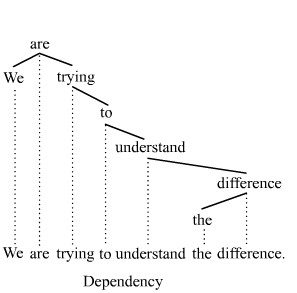

Pero entonces, **¿para qué necesitamos las relaciones de dependencia en NLP?** Principalmente porque una buena parte de los **algoritmos** involucrados en esta área **utilizan modelos estadísticos basados en representaciones vectoriales de los tokens**, y **entienden a las oraciones como una secuencia de palabras**. Sin embargo, como vemos en el ejemplo anterior, una oración es mucho más que una secuencia de tokens: cada palabra tiene un rol definido (verbo, sustantivo, adjetivo, objeto, etc).

Una de las aplicaciones más útiles y simples de las etiquetas de dependencia es **determinar el sujeto y el objeto de una oración**. Veamos el siguiente ejemplo de dos frases similares pero con significados completamente diferentes:

* I forwarded you the email.
* You forwarded me the email.

Las oraciones son similares, pero su sujeto y su objeto están invertidos. Sin embargo, si quitamos las stopwords, las dos frases resultan en "forwarded email". **Sin etiquetas de dependencia, sería imposible para la computadora diferenciarlas entre ellas**.
***

### Relaciones sintácticas

spaCy **asigna a cada token una etiqueta de dependencia** al igual que con el resto de los tags que hemos visto. Estas etiquetas de dependencia **describen la relación sintáctica entre dos tokens** de la siguiente manera: uno de los tokens es el *padre sintáctico* (**HEAD**) y el otro es su *dependiente* (**CHILD**). La etiqueta de dependencia se asigna al CHILD, y se puede observar mediante `dep_`. Veamos un ejemplo:

In [10]:
doc = nlp("blue flower")

for token in doc:
    print(token.text, token.dep_, spacy.explain(token.dep_))

blue amod adjectival modifier
flower ROOT None


En este ejemplo, "blue" es el *adjective modifier* de "flower", por lo que recibe la etiqueta de amod. "Flower" es el **ROOT** de la oración, que es **una etiqueta especial que suele referir al verbo principal de la oración**. Si estamos procesando una frase (en contraposición a una oración completa) como en este caso, el **ROOT se asigna a la raíz de la frase, que es el sujeto principal**. Cada oración/frase puede tener **una única etiqueta ROOT**, y es además la raíz del árbol sintáctico que vimos previamente.

**Los nodos** de los árboles sintácticos **pueden tener más de un CHILD**, pero **cada CHILD no puede tener más de un padre**. Es decir, cada token tiene exactamente un HEAD, pero puede tener varios CHILD. Es por eso que se asigna la etiqueta de dependencia al nodo dependiente.

En el libro, pueden observar una lista de todas las dependencias en inglés en la página 83, y varios ejemplos de árboles sintácticos de spaCy entre las páginas 84 y 94. También se puede usar displaCy para crear visualizaciones.

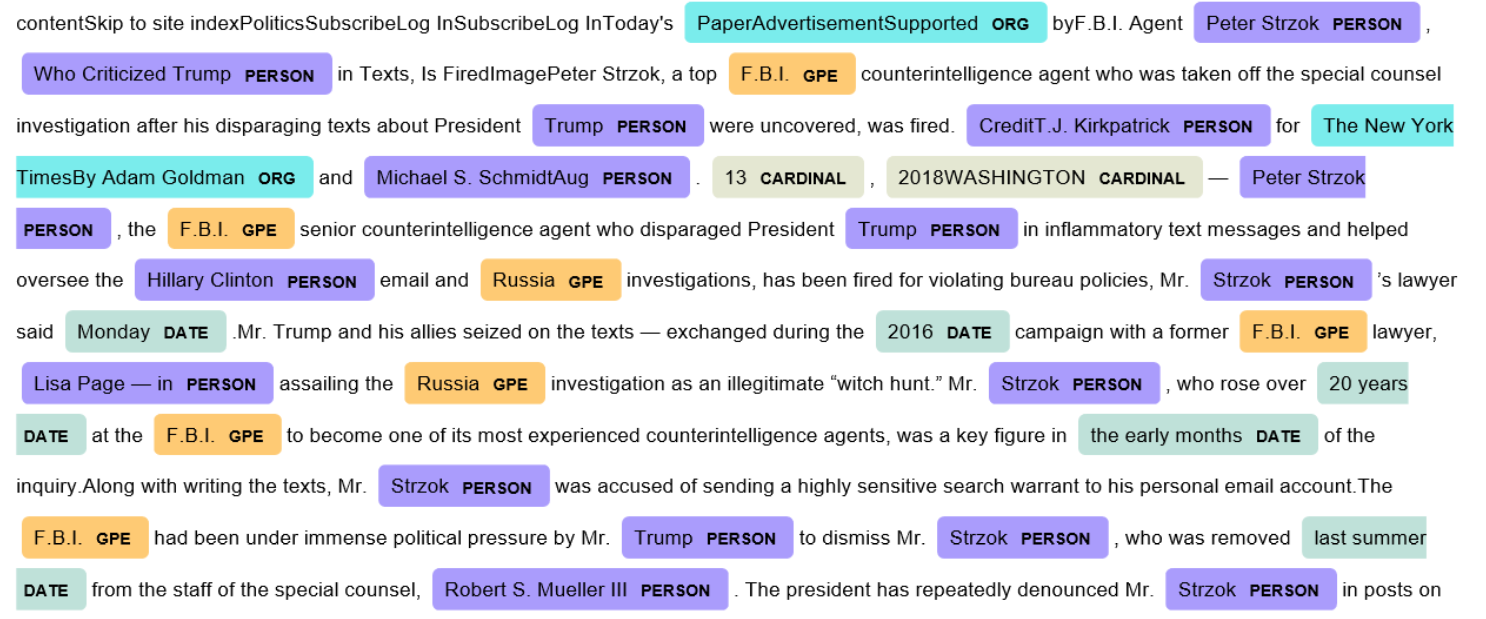

### Introducción al NER y las named entities

En la clase 1, vimos que el pipeline de spaCy tiene varios componentes. Algunas de ellas asignan las etiquetas que hemos visto en esta notebook. Entre los componentes del pipeline, se encuentra el **named entity recognizer (NER)** que, como su nombre indica, se enfoca en las "named entities".

**¿Qué es una named entity?** Básicamente es un **objeto del mundo real al que nos podemos referir mediante un nombre propio o una cantidad de interés**. Puede ser una persona, un lugar (ciudad, país, estado, edificio famoso, etc), una organización, una empresa, un producto, fechas, horarios, porcentajes, cantidades monetarias, un medicamento o el nombre de una enfermedad, entre otros.

Una de las particularidades del NER es que **puede tener tantas categorías como nosotros deseemos**. Las más comunes son persona, ubicación y organización, pero tiene un gran espectro de posibilidades como MONEY, PERCENTAGE y WORK_OF_ART. Al igual que con los modelos estadísticos del POS tagger, los NER también son modelos secuenciales.

Los NER son **uno de los principales componentes para entender el tópico de un texto**, ya que usualmente las entidades corresponden a una categoría semántica. Por ejemplo, Donald Trump suele estar relacionado a temas de política, Leonardo DiCaprio tiene que ver con cine, LeBron James tiene que ver con deporte, etcétera.

Para poder acceder a las named entities de un `Doc`, podemos hacerlo con `doc.ents`, que es una lista de objetos `Span`. Además, el NER asigna a esas entidades su etiqueta, accesible mediante `token.ent_type_`, que en caso de no ser una named entity es un string vacío. Al igual que en los otros casos, `spacy.explain(token.ent_type_)` nos indica qué significa cada etiqueta.

Veamos un par de ejemplos básicos:

In [11]:
doc = nlp("The president Donald Trump visited France.")

doc.ents, type(doc.ents[1])

((Donald Trump, France), spacy.tokens.span.Span)

In [12]:
doc = nlp("Albert Einstein was born in Ulm on 1879. He studied electronical engineering at ETH Zurich.")

doc.ents

(Albert Einstein, Ulm, 1879, ETH Zurich)

In [13]:
for token in doc:
    print(str(f"{token.text:18}") + str(f"{token.ent_type_:10}") + str(f"{spacy.explain(token.ent_type_)}"))

Albert            PERSON    People, including fictional
Einstein          PERSON    People, including fictional
was                         None
born                        None
in                          None
Ulm               GPE       Countries, cities, states
on                          None
1879              DATE      Absolute or relative dates or periods
.                           None
He                          None
studied                     None
electronical                None
engineering                 None
at                          None
ETH               ORG       Companies, agencies, institutions, etc.
Zurich            ORG       Companies, agencies, institutions, etc.
.                           None


### Fusión y división (merging/splitting)

Un caso especial del trabajo con NER es cuando queremos fusionar o dividir una entidad con múltiples palabras, por ejemplo una ciudad con nombre compuesto como New York. Para esto existe la función `doc.retokenize()`, al cual podemos indicarle la función que queremos realizar y pasarle un diccionario al parámetro `attrs=` que indique cómo debe modificar el token.

**Ejemplo 1**: fusión (merge) de tokens de named entities.

In [14]:
# Creamos el Doc y vemos las entidades

doc = nlp("She lived in New Hampshire.")

doc.ents

(New Hampshire,)

In [15]:
# Visualizamos cada token y su índice dentro del Doc

[(token.text, token.i) for token in doc]

[('She', 0), ('lived', 1), ('in', 2), ('New', 3), ('Hampshire', 4), ('.', 5)]

In [16]:
# Vemos la longitud del Doc

len(doc)

6

In [17]:
# Retokenizamos con el LEMMA "new hampshire" y la función merge del retokenizador

with doc.retokenize() as retokenizer:
    retokenizer.merge(doc[3:5], attrs={"LEMMA": "new hampshire"}) #3 se incluye, 5 no

In [18]:
# Vemos que ahora New Hampshire es una única entidad

[(token.text, token.i) for token in doc]

[('She', 0), ('lived', 1), ('in', 2), ('New Hampshire', 3), ('.', 4)]

In [19]:
# La longitud del Doc se redujo

len(doc)

5

**Ejemplo 2**: Tenemos un token mal escrito (en este caso, "NewHampshire") y queremos separarlo en dos para que lo reconozca correctamente y asignar las etiquetas a los tokens retokenizados (*se me lengua la traba*) mediante un diccionario de `attrs=`. Luego, reacomodaremos el árbol de dependencias con el parámetro `heads=`.

**Nota**: dividir un `Span` es más complicado que fusionarlo, ya que estamos cambiando el árbol de dependencia, necesitamos crear POS tags, dependency labels y atributos para los nuevos tokens, y asignar nuevas características lingüísticas a la nueva palabra.

In [20]:
# Creamos el Doc y vemos las entidades

doc = nlp("She lived in NewHampshire.")

doc.ents

(NewHampshire,)

In [21]:
# Visualizamos cada token, su lemma y su índice dentro del Doc

[(token.text, token.lemma_, token.i) for token in doc]

[('She', 'she', 0),
 ('lived', 'live', 1),
 ('in', 'in', 2),
 ('NewHampshire', 'NewHampshire', 3),
 ('.', '.', 4)]

In [22]:
# Vemos la longitud del Doc

len(doc)

5

In [23]:
# Vemos las etiquetas de los tokens que ya tenemos en el Doc

for token in doc:
    print(str(f"{token.text:18}") + str(f"{token.pos_:10}") + str(f"{token.tag_:10}") + str(f"{token.dep_}"))

She               PRON      PRP       nsubj
lived             VERB      VBD       ROOT
in                ADP       IN        prep
NewHampshire      PROPN     NNP       pobj
.                 PUNCT     .         punct


In [24]:
# Retokenizamos con la función split del retokenizer

with doc.retokenize() as retokenizer:
    heads = [(doc[3], 1), doc[2]]
    attrs = {"TAG": ["NNP", "NNP"],
            "DEP": ["compound", "pobj"]}
    retokenizer.split(doc[3], ["New", "Hampshire"],
                     heads=heads, attrs=attrs)

[(token.text, token.lemma_, token.i) for token in doc]

[('She', 'she', 0),
 ('lived', 'live', 1),
 ('in', 'in', 2),
 ('New', 'New', 3),
 ('Hampshire', 'Hampshire', 4),
 ('.', '.', 5)]

In [25]:
for token in doc:
    print(str(f"{token.text:18}") + str(f"{token.pos_:10}") + str(f"{token.tag_:10}") + str(f"{token.dep_}"))

She               PRON      PRP       nsubj
lived             VERB      VBD       ROOT
in                ADP       IN        prep
New               PROPN     NNP       compound
Hampshire         PUNCT     NNP       pobj
.                 PUNCT     .         punct


In [26]:
len(doc)

6